In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
iris=pd.read_csv('Iris.csv')

In [38]:
df=iris[['SepalLengthCm','PetalLengthCm','Species']]

In [39]:
df

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
145,6.7,5.2,Iris-virginica
146,6.3,5.0,Iris-virginica
147,6.5,5.2,Iris-virginica
148,6.2,5.4,Iris-virginica


In [40]:
df.rename(columns={'SepalLengthCm':'SL','PetalLengthCm':'PL'},inplace=True)

In [41]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [42]:
df['Species'].replace('Iris-virginica','2',inplace=True)
df['Species'].replace('Iris-setosa','0',inplace=True)
df['Species'].replace('Iris-versicolor','1',inplace=True)

In [43]:
df

,SL,PL,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## creating a knn classifier

In [45]:
X=df.iloc[:,0:2].values

In [46]:
X.shape

(150, 2)

In [50]:
y=df.iloc[:,-1].values

In [51]:
y.shape

(150,)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
X_train.shape

(120, 2)

In [54]:
X_test.shape

(30, 2)

In [ ]:
#lowering the range difference

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [60]:
#1st method
np.sqrt(X_train.shape[0])

10.954451150103322

In [61]:
k=10

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [63]:
#train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [64]:
y_pred=knn.predict(X_test)

In [66]:
y_pred.shape

(30,)

In [68]:
y_test.shape

(30,)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [1, 9, 0],
       [0, 2, 9]], dtype=int64)

In [72]:
#2nd method

accuracy=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [74]:
len(accuracy)

25

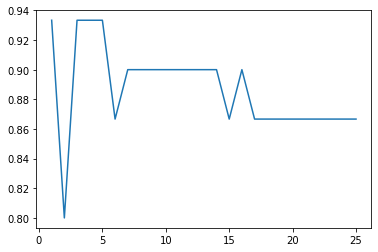

In [79]:
plt.plot(range(1,26),accuracy)
plt.show()

In [80]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [81]:
y_pred=knn.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.9333333333333333